In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ensemble_model.preprocesser as preprocesser 
import ensemble_model.ensemble_model as em 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer
import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
def diff_parser(text):
    diff = [x for x in whatthepatch.parse_patch(text)]
    diff = diff[0]
    tzu = whatthepatch.apply_diff(diff, lao)
    return res

In [3]:

df = pd.read_csv(r'/root/autodl-tmp/ensemble-commit/dataset/dataset.csv', index_col=0, encoding='utf_8_sig')
df.fillna('', inplace=True)
label2id={'negative':0,'positive':1}
df = df.replace({"label": label2id})
df



/tmp/ipykernel_4535/1745998878.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"label": label2id})


,label,message,diff
0,0,Merge pull request #46 from rufferson/saslx-tl...,diff --git a/lib/DJabberd.pm b/lib/DJabberd.pm...
1,1,Fix leaks in kadmin server stubs [CVE-2015-863...,diff --git a/src/kadmin/server/server_stubs.c ...
2,1,Validate authorization request on approval\n\n...,diff --git a/spring-security-oauth2/src/main/j...
3,1,Release 2.72.4+171110,diff --git a/application/config/version.php b/...
4,0,Fixing compiler warnings.,diff --git a/src/main.c b/src/main.c\nindex 50...
...,...,...,...
10107,0,les: remove useless protocol defines (#22115)\...,diff --git a/les/benchmark.go b/les/benchmark....
10108,1,Merge pull request #2067 from realm/tg-swift-l...,diff --git a/CHANGELOG.md b/CHANGELOG.md\ninde...
10109,0,[fix] 新規アカウント作成ページの翻訳を修正,diff --git a/app/locales/ja_JP/LC_MESSAGES/mes...
10110,0,Merge branch 'hotfixes',diff --git a/CHANGELOG.txt b/CHANGELOG.txt\nin...


In [4]:
def find_longest_list(lists):
    # print(lists)
    if not lists:
        return None
    try:
        longest_list = max(lists, key=len)
    except:
        longest_list = None
    return longest_list

In [5]:
def extract_lines(changes):
    try:
       res = ''.join([x.line for x in changes])
    except:
       res = None
    return res

In [6]:
len(df)

10112

In [7]:
df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [8]:
# extracted_cols

In [9]:
# df['command'][2]

In [10]:
# df[['diff_left', 'diff_right']] = extracted_cols.fillna('')

In [11]:
# df['diff_right'].str[2:]

In [12]:
# df['command_len'] = df['command'].str.len()

In [13]:
# df['command_len'][5] 

In [14]:
# df['command'][3]

In [15]:
# # 设置数据缺失的情况
# # 设置随机种子以便结果可重复
# import numpy as np
# np.random.seed(42)

# # 定义缺失值的比例
# missing_rate = 0.2

# # 计算每列需要创建缺失值的数量
# num_missing = int(missing_rate * len(df))

# # 随机选择行进行缺失
# for col in ['message', 'diff']:
#     missing_indices = np.random.choice(df.index, num_missing, replace=False)
    
#     # 选择每个单元格的部分字符来替换，而不是全部替换成NaN
#     for idx in missing_indices:
#         if np.random.rand() > 0.5:
#             # 保留前半部分
#             try:
#                 # print(df.loc[idx, col][:len(df.loc[idx, col])//2] + '...')
#                 df.loc[idx, col] = df.loc[idx, col][:len(df.loc[idx, col])//2] + '...'
#             except:
#                 continue
#         else:
#             # 保留后半部分
#             try:
#                 # print('...' + df.loc[idx, col][len(df.loc[idx, col])//2:])
#                 df.loc[idx, col] = '...' + df.loc[idx, col][len(df.loc[idx, col])//2:]
#             except:
#                 continue

In [16]:
df.dropna(inplace=True)

In [17]:
df_dataset = []
for index, row in df.iterrows():
  # df_dataset.append([row['message'],row['command'],row['label']])
    
    df_dataset.append([row['message'],row['command'],row['label']])
    

In [18]:
len(df_dataset)

9687

In [19]:
df_dataset[0]

['Merge pull request #46 from rufferson/saslx-tlsoff-tests\n\nSASL-External, TLS-Offload tests and fixups',
 'package DJabberd::Form;# vim: sts=4 ai:use strict;use DJabberd::XMLElement;use overload \'""\' => \\&as_xml;our @field_types = (    \'boolean\',    \'fixed\',    \'hidden\',    \'jid-multi\',    \'jid-single\',    \'list-multi\',    \'list-single\',    \'text-multi\',    \'text-private\',    \'text-single\');sub new {    my $class = shift;    my $self;    # Try to create from XMLElement tree    if(@_ && $_[0] && ref($_[0]) && UNIVERSAL::isa($_[0],\'DJabberd::XMLElement\') && $_[0]->element eq \'{jabber:x:data}x\' && $_[0]->children) {\t$self = from_element($_[0]);    } else {\t# Or from raw struct: new(\'type\',[{var=>"var",value=>["val"]},...],[title=>"title",][instructions=>"instructions"]);\tmy $type = shift;\tmy $fields = shift;\tmy %args = @_;\tif($type && ref($fields) eq \'ARRAY\' && @{$fields}) {\t    $self = { type => $type, fields => {}, order => []};\t    foreach my$f

In [20]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('/root/autodl-tmp/models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('/root/autodl-tmp/models/bert-base-cased')

codebert_model = RobertaModel.from_pretrained('/root/autodl-tmp/models/codebert-base')
codebert_tokenizer = RobertaTokenizer.from_pretrained('/root/autodl-tmp/models/codebert-base')

Some weights of the model checkpoint at /root/autodl-tmp/models/bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
len(df_dataset)

9687

/root/miniconda3/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


=============================train========================
Epoch 1/10, Loss: 0.36553915418584526
=============================eval========================
Validation Accuracy: 0.8890608875128999
Precision: 0.8912467629134955
Recall: 0.8890608875128999
F1-Score: 0.889737980553254
Epoch 1/10, Validation Accuracy: 0.8890608875128999
当前best acc 0.8890608875128999
=============================train========================
Epoch 2/10, Loss: 0.1847511249434845
=============================eval========================
Validation Accuracy: 0.8988648090815273
Precision: 0.8994114857891948
Recall: 0.8988648090815273
F1-Score: 0.8990883886688692
Epoch 2/10, Validation Accuracy: 0.8988648090815273
当前best acc 0.8988648090815273
=============================train========================
Epoch 3/10, Loss: 0.09438454344716322
=============================eval========================
Validation Accuracy: 0.9102167182662538
Precision: 0.9098703807041754
Recall: 0.9102167182662538
F1-Score: 0.909478126265

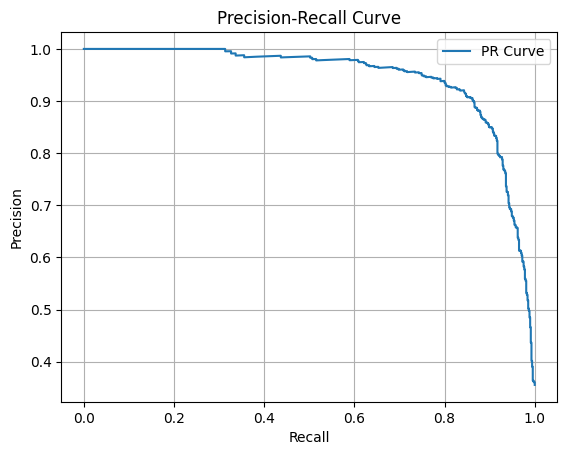

NameError: name 'TSNE' is not defined

In [22]:
# Split the dataset
# preprocesser = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer)
train_data, val_data = train_test_split(df_dataset, test_size=0.2, random_state=1)

# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer)
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)




# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)


base_model1 = em.BaseModel(bert_model,bert_tokenizer)
base_model2 = em.BaseModel(codebert_model,codebert_tokenizer)

# Create stacking model
stacking_model = em.StackingMoEModel(base_model1, base_model2)
# Train the model
stacking_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

In [ ]:
# trainer.model.save_pretrained(nb_fname)

In [ ]:
import seaborn as sns



fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Class Name', palette='hls')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of news using t-SNE');
plt.xlabel('TSNE1');
plt.ylabel('TSNE2');
plt.axis('equal')